# Bekerja dengan Audio

## Pendahuluan

Di hands-on ini, kita akan belajar bagaimana cara bekerja dengan audio menggunakan Python.
- Pastikan environment yang aktif di jupyter notebook ini sudah sesuai

## Import Library

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import os
import wave

## Memuat File Audio yang di download

Sumber audio .wav didapat dari : https://www.kaggle.com/datasets/pavanelisetty/sample-audio-files-for-speech-recognition?resource=download

In [11]:
file_path = os.path.join(os.getcwd(), 'attachment', 'harvard.wav')

# check jika file tidak ada
if not os.path.exists(file_path):
    print('File tidak ditemukan')
    exit()

#### Menggunakan `wave` untuk membuka file audio yang di download.

**Apa Itu Waveform?**

**Waveform** adalah representasi visual dari gelombang suara atau sinyal audio dalam domain waktu. Dalam grafik waveform, sumbu horizontal (x) biasanya mewakili waktu, sedangkan sumbu vertikal (y) mewakili amplitudo sinyal audio pada waktu tertentu. Dengan kata lain, waveform menunjukkan bagaimana amplitudo suara berubah seiring berjalannya waktu.

Waveform memberikan informasi penting tentang karakteristik audio, seperti:
- **Amplitudo**: Ketinggian atau intensitas gelombang suara. Amplitudo tinggi biasanya terkait dengan suara yang lebih keras.
- **Frekuensi**: Jumlah siklus gelombang per detik. Meskipun waveform sendiri tidak langsung menunjukkan frekuensi, pola-pola dalam waveform bisa memberikan indikasi tentang frekuensi sinyal.
- **Durasi**: Panjang waktu sinyal audio.

**Tentang Package `wave`**

`import wave` adalah modul dalam Python yang digunakan untuk membaca dan menulis file audio dalam format WAV. Format WAV adalah format audio yang tidak terkompresi, yang berarti data audio disimpan dalam bentuk aslinya tanpa pengurangan kualitas.

In [12]:
with wave.open(file_path, 'r') as wav_file:                 # membuka file wav
    frames = wav_file.readframes(-1)                        # membaca semua frame
    sound_data = np.frombuffer(frames, dtype=np.int16)      # mengubah frame ke array numpy
    frame_rate = wav_file.getframerate()                    # mendapatkan sample rate

In [13]:
print(f"Isi dari sound_data: {sound_data}")
print(f"Panjang dari sound_data: {len(sound_data)}")
print(f"Isi data pada elemen ke 500000 - 500020: {sound_data[500000:500020]}")
print(f"Sample rate: {frame_rate}")

Isi dari sound_data: [  0   0   0 ... -58 -61 -60]
Panjang dari sound_data: 1619016
Isi data pada elemen ke 500000 - 500020: [1015 1014 1003 1002  986  987 1018 1018 1102 1102 1202 1202 1319 1320
 1433 1434 1449 1450 1395 1395]
Sample rate: 44100


#### Memvisualisasikan file audio yang di download.

In [14]:
# sound_data_stereo = sound_data.reshape(-1, n_channels)

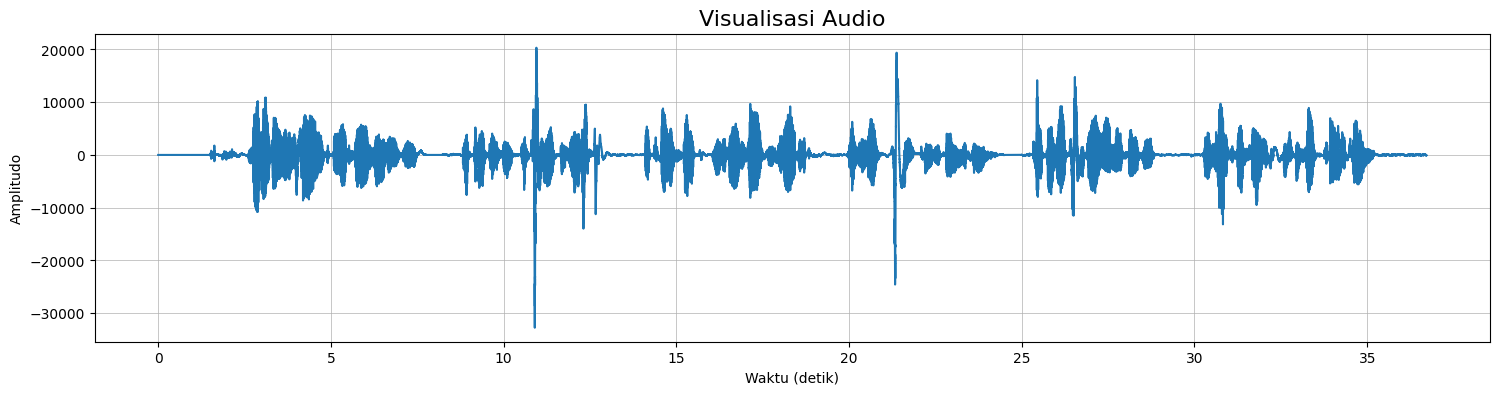

In [15]:
time_axis = np.linspace(0, len(sound_data) / frame_rate, num=len(sound_data))

# menampilkan plot dengan matplotlib
plt.figure(figsize=(18, 4))

# Buat judul "Visualisasi Audio"
plt.title('Visualisasi Audio', fontsize=16)
plt.plot(time_axis, sound_data)
plt.xlabel('Waktu (detik)')
plt.ylabel('Amplitudo')
# Menampilkan grid yang halus
plt.grid(linestyle='-', linewidth=0.5)
plt.show()


 ## Spectogram

 - Using the Librosa for the Spectogram purpose


In [20]:
import librosa
import librosa.display

file_path = os.path.join(os.getcwd(), "attachment", "harvard.wav")

y, sr = librosa.load(file_path)

S = librosa.stft(y)

S_db = librosa.amplitude_to_db(abs(S))

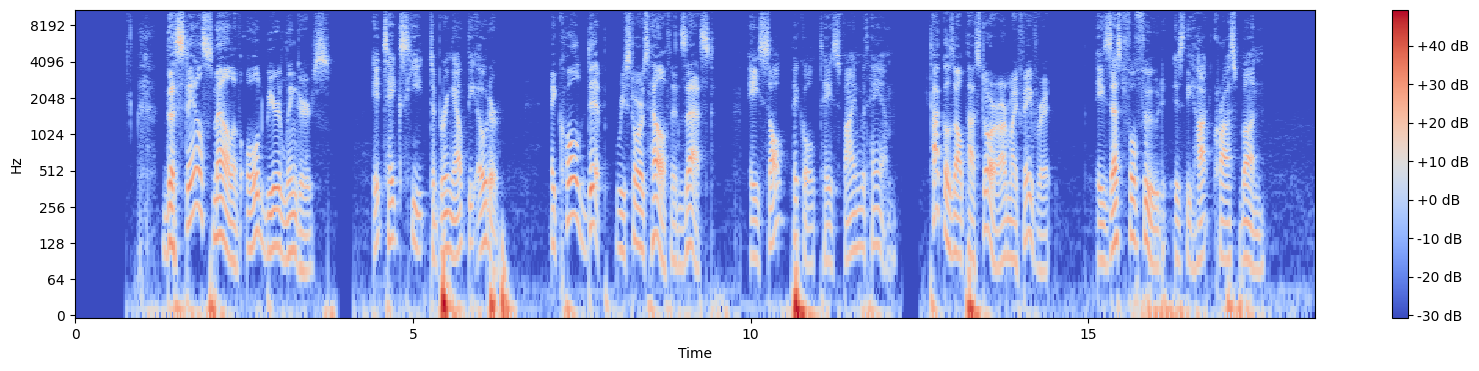

In [21]:
plt.figure(figsize=(20, 4))
librosa.display.specshow(S_db, sr=sr, x_axis="time", y_axis="log")
plt.colorbar(format="%+2.0f dB")
plt.show()

In [ ]:
## Trimming Audio

In [22]:
with wave.open(file_path, 'r') as wav_file:                 # membuka file wav
    frames = wav_file.readframes(-1)                        # membaca semua frame
    sound_data = np.frombuffer(frames, dtype=np.int16)      # mengubah frame ke array numpy
    frame_rate = wav_file.getframerate() 

    n_channels = wav_file.getnchannels()

sound_data = sound_data.reshape(-1, n_channels)

print(f"Value of L-audio: {sound_data[:, 0]}")
print(f"Value of R-audio: {sound_data[:, 1]}")

Value of L-audio: [  0   0  -1 ... -57 -57 -61]
Value of R-audio: [  0   1  -1 ... -57 -58 -60]


In [23]:
## Determine the start and end of the trim
start_trim_seconds = 3
end_trim_seconds = 6

start_trim_sample = start_trim_seconds * frame_rate
end_trim_sample = end_trim_seconds * frame_rate

print(start_trim_sample)

132300


In [ ]:
## Doing some trimming
audio_tree = sound_data[start_trim_sample, end_trim_sample, :]

trim_axis_trimmed = np.linspace(start_trim_seconds, end_trim_seconds, frame_rate)
ax, plt = plot.subplots(2, 1, figsize=(18, 5))
plt[0].plot()